<a href="https://colab.research.google.com/github/cmgospod/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module3-dimensionality-reduction/High%20Dimensional%20Data%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

(-2, 2)

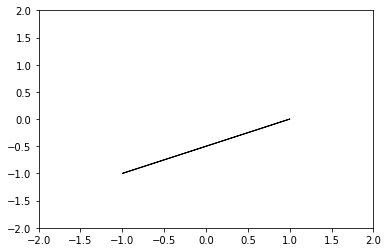

In [4]:
plt.arrow(-1,-1,2,1)
plt.xlim(-2,2)
plt.ylim(-2,2)

(-2, 2)

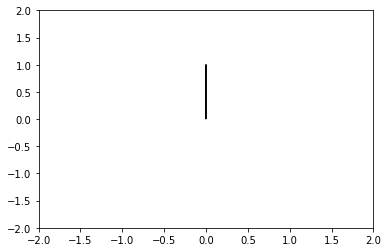

In [5]:
plt.arrow(0,0,0,1)
plt.xlim(-2,2)
plt.ylim(-2,2)

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

A function, by definition, maps each input to a single output.

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Only relation 2 is a function because all of the others map a single input to multiple outputs.

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

Function M maps from the third dimension to the third dimension. Function N maps from the fourth dimension to the second.

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

While nothing is stopping you from creating a function like f(x) = (x,2x), such a function will not be able to fill the second dimension space. Without this filling of R^2 the output cannot be said to really be in two dimensions, as it can be expressed with only a single variable.

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

p[1]  =  [1]  p[0]  =  [3]     [1 -1]
 [0]  =  [-1]  [1]  =  [2]     [3 2]

q[1] = [4] q[0] = [1] q[0] = [2]   [4 -1 5]
 [0] = [-1] [1] = [2]  [0] = [3]   [1 2 1]
 [0] = [5]  [0] = [1]  [1] = [-2]  [2 3 -2]

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [16]:
testp = [2,3]
funcp = [testp[0] + 3*testp[1], 2*testp[1] - testp[0]]
funcp

[11, 4]

In [22]:
pmatrix = np.array([[1,-1], [3,2]])
np.matmul(testp, pmatrix)

array([11,  4])

In [24]:
testq = [2,3,4]
funcq = [4*testq[0] + testq[1] + 2*testq[2], 2*testq[1] - testq[0] + 3*testq[2], 5*testq[0] - 2*testq[2] + testq[1]]
funcq

[19, 16, 5]

In [26]:
qmatrix = np.array([[4, -1, 5], [1, 2, 1], [2, 3, -2]])
np.matmul(testq, qmatrix)

array([19, 16,  5])

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Every transformation of a vector can be thought of as a warping of space. Space can be stretched, squished, and rotated, but throughout this there is at least one vector that will not be rotated. This is an eigenvector. This eigenvector, however, will often be stretched or squished by some value. This value is the eigenvalue.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

High dimensional space is incrediby difficult to visualize and gain an intuitive grasp of. In addition, data sets with a high number of dimensions can be highly subject to overfitting due to the large number of parameters.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

As a rule of thumb, you should always have at minimum five times as many observations as parameters.

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [29]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [82]:
dfs = df.iloc[:,0:4].to_numpy()
means = np.mean(dfs.T, axis=1)
dfs2 = dfs - means
devs = np.std(dfs2.T, axis=1)
dfs3 = dfs2 / devs
cov_mats = np.cov(dfs3.T)
vals, vects = np.linalg.eig(cov_mats)
finals = vects.T.dot(dfs3.T)
finals

array([[-2.26454173e+00, -2.08642550e+00, -2.36795045e+00,
        -2.30419716e+00, -2.38877749e+00, -2.07053681e+00,
        -2.44571134e+00, -2.23384186e+00, -2.34195768e+00,
        -2.18867576e+00, -2.16348656e+00, -2.32737775e+00,
        -2.22408272e+00, -2.63971626e+00, -2.19229151e+00,
        -2.25146521e+00, -2.20275048e+00, -2.19017916e+00,
        -1.89407429e+00, -2.33994907e+00, -1.91455639e+00,
        -2.20464540e+00, -2.77416979e+00, -1.82041156e+00,
        -2.22821750e+00, -1.95702401e+00, -2.05206331e+00,
        -2.16819365e+00, -2.14030596e+00, -2.26879019e+00,
        -2.14455443e+00, -1.83193810e+00, -2.60820287e+00,
        -2.43795086e+00, -2.18867576e+00, -2.21111990e+00,
        -2.04441652e+00, -2.18867576e+00, -2.43595220e+00,
        -2.17054720e+00, -2.28652724e+00, -1.87170722e+00,
        -2.55783442e+00, -1.96427929e+00, -2.13337283e+00,
        -2.07535759e+00, -2.38125822e+00, -2.39819169e+00,
        -2.22678121e+00, -2.20595417e+00,  1.10399365e+0

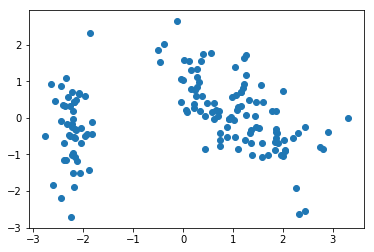

In [84]:
pc1 = finals[0]
pc2 = finals[1]
plt.scatter(pc1, pc2)

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)